<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123
## Confidence Intervals

Objectives: 

- Student can explain the concepts of statistical estimate, precision, and standard error in regards to inferential statistics
- Student can explain the implications of the central limit theorem in inferential statistics
- Student can explain the purpose of confidence intervals and identify applications for their use
- Studnet can demonstrate how to build a confidence interval around a sample estimate
- Student can report margin of error and visualize graphically a confidence interval to communicate the precision of sample estimates to a non-technical audience

## Estimates, Precision, and Standard Error

Estimate: sample statistic (mean, variance, SD)
Slope & intercept of a linear regression model (line of best fit)
"Point estimate" generated from the sample we hope is representative of the population 

"Point estimate": any point of estimate reported as a single number

Precision: how tight the confidence is around the central value (point estimate) higher precision means we're estimating the population value is within a tighter range of values

Precision (together of similar value) vs accuracy (the right value we want)

## Central Limit Theorem



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []

for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.5833333333333334, 0.4166666666666667, 0.25, 0.75, 0.5, 0.5, 0.6666666666666666, 0.5, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5, 0.4166666666666667, 0.5833333333333334, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.3333333333333333, 0.16666666666666666, 0.5833333333333334, 0.5, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.5, 0.5833333333333334, 0.5, 0.3333333333333333, 0.5, 0.4166666666666667, 0.5, 0.6666666666666666, 0.75, 0.5, 0.25, 0.5, 0.25, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.6666666666666666, 0.25, 0.5, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5, 0.25, 0.5, 0.75, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.4166666666666667, 0.6666666666666666, 0.25, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.5, 0.4166666666666667, 0.4166666666666667, 0.75, 0.5, 0.25, 0.4166666666

In [4]:
df = pd.DataFrame({'single_sample':one_sample})
df.head()

,single_sample
0,1
1,1
2,1
3,1
4,0


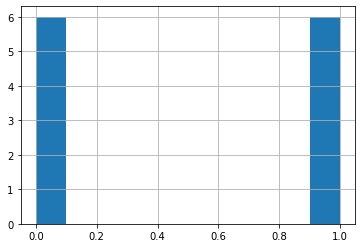

In [5]:
df['single_sample'].hist()

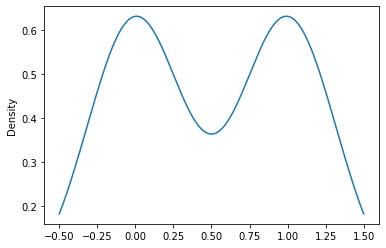

In [6]:
df['single_sample'].plot.density()

(array([  1.,  11.,   0.,  47.,   0., 179.,   0., 322.,   0., 559.,   0.,
        712.,   0., 583.,   0., 352.,   0., 180.,   0.,  46.,   0.,   7.,
          1.]),
 array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
        0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435,
        0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.69565217, 0.73913043, 0.7826087 , 0.82608696,
        0.86956522, 0.91304348, 0.95652174, 1.        ]),
 <a list of 23 Patch objects>)

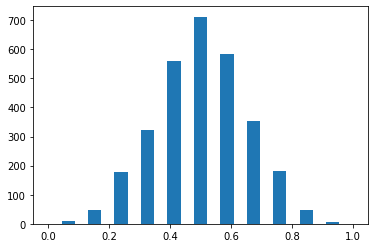

In [7]:
plt.hist(sample_means, bins=23)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [31]:
sample_means_small = []
sample_means_large = []
sample_means_huge = []

for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  coinflips_huge = np.random.binomial(n=1, p=.5, size=1000)

  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  one_small_huge = coinflips_huge

  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())
  sample_means_huge.append(coinflips_huge.mean())


print(len(sample_means_small))
print(sample_means_small)

3000
[0.35, 0.6, 0.55, 0.55, 0.5, 0.55, 0.55, 0.45, 0.35, 0.65, 0.5, 0.5, 0.45, 0.5, 0.55, 0.7, 0.45, 0.5, 0.3, 0.3, 0.6, 0.35, 0.45, 0.7, 0.45, 0.65, 0.5, 0.35, 0.5, 0.5, 0.65, 0.45, 0.55, 0.4, 0.4, 0.7, 0.6, 0.25, 0.5, 0.3, 0.35, 0.5, 0.4, 0.45, 0.5, 0.6, 0.65, 0.55, 0.4, 0.7, 0.5, 0.7, 0.6, 0.5, 0.5, 0.3, 0.55, 0.4, 0.5, 0.6, 0.7, 0.3, 0.45, 0.55, 0.7, 0.55, 0.4, 0.45, 0.35, 0.45, 0.3, 0.55, 0.4, 0.65, 0.35, 0.45, 0.65, 0.45, 0.55, 0.55, 0.3, 0.5, 0.35, 0.5, 0.6, 0.85, 0.5, 0.25, 0.5, 0.55, 0.6, 0.7, 0.55, 0.45, 0.5, 0.65, 0.5, 0.4, 0.35, 0.4, 0.65, 0.6, 0.45, 0.35, 0.55, 0.5, 0.15, 0.8, 0.45, 0.45, 0.6, 0.55, 0.45, 0.4, 0.3, 0.45, 0.5, 0.7, 0.7, 0.65, 0.5, 0.75, 0.45, 0.75, 0.5, 0.5, 0.4, 0.6, 0.65, 0.3, 0.6, 0.45, 0.65, 0.6, 0.55, 0.5, 0.4, 0.55, 0.55, 0.65, 0.4, 0.5, 0.45, 0.55, 0.4, 0.45, 0.45, 0.65, 0.5, 0.6, 0.5, 0.5, 0.45, 0.3, 0.4, 0.6, 0.5, 0.45, 0.55, 0.5, 0.65, 0.55, 0.55, 0.7, 0.35, 0.5, 0.55, 0.55, 0.25, 0.4, 0.4, 0.6, 0.6, 0.45, 0.7, 0.5, 0.3, 0.65, 0.65, 0.65, 0.6, 0.

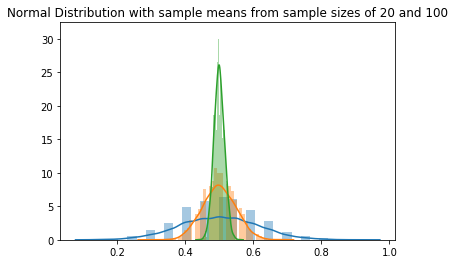

In [32]:
import seaborn as sns

sns.distplot(sample_means_small)
sns.distplot(sample_means_large)
sns.distplot(sample_means_huge)

plt.title("Normal Distribution with sample means from sample sizes of 20 and 100")
plt.show()

In [18]:
coinflips_small = np.random.binomial(n=1, p=.5, size=20)

coinflips_small.mean()

0.4

In [24]:
coinflips_large = np.random.binomial(n=1, p=.5, size=100)

coinflips_large.mean()

0.53

In [34]:
coinflips_huge = np.random.binomial(n=1, p=.5, size=1000)

coinflips_huge.mean()

#the larger the sample size, the smaller the confidence interval, the more precise the data

0.54

## Standard Error of the Mean

SE of the mean is... the standard deviation of this imaginary distribution of sample means (like the ones we're creating above)

68, 95, 99.7 Rule:


e.g., 68% of data falls within 1 SD of the mean

95% of data falls within 2 SD of the mean

99.7% of data falls within 2 SD of the mean

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

print(df.shape)
df.head(15)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [37]:
#sample mean to build a confidence interval with
sample = df.sample(20, random_state=42)

sample.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


In [38]:
#Point estimate
sample['education-num'].mean()

10.75

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

# Numpy POPULATION vs SAMPLE values

by default np.std() calculates POPULATION SD, not sample SD

![](https://standard-deviation-calculator.com/wp-content/uploads/2018/03/sample-variance-formula-descriptive-statistics-54-638-cb1374419364.jpg)

In [41]:
# by default np.std() calculates the POPULATION standard deviation, 
# and not the SAMPLE standard deviation

#default DDOF = 0
print('Population SD', np.std(sample['education-num']))


#Denominator DOF (sample SD)
print('Sample SD', np.std(sample['education-num'], ddof=1))

Population SD 2.5860201081971503
Sample SD 2.653200649067184


In [61]:
from scipy import stats

#by default confidence level is .95
def confidence_interval(sample, confidence_level=.95):
    #numpy array for consistency
    data = np.array(sample)
    
    #sample SD (DDOF=1) with numpy to get sample metrics
    s = np.std(data, ddof=1) 
    n = data.shape[0]
    x_bar = np.mean(data)
    
    #look up the t-stat that corresponds to sample size and confidence level
    t = stats.t.ppf((1-((1-confidence_level)/2)), n-1)
    
    #standard error
    std_err = (s/np.sqrt(n))
    
    #margin of error
    moe = t*std_err
    
    #lower and upper bound of confidence interval 
    lower_bound = x_bar - moe
    upper_bound = x_bar + moe
    
    return (lower_bound, x_bar, upper_bound, moe)
    
confidence_interval(sample['education-num'])

(9.920884750341168, 10.083, 10.245115249658832, 0.1621152496588319)

In [52]:
##with 95% confidence, the true population value is within the 
#upper and lower bounds of the confidence interval

sample = df.sample(20, random_state=42)
confidence_interval(sample['education-num'])

(9.508263873113904, 10.75, 11.991736126886096, 1.2417361268860965)

In [53]:
sample = df.sample(100, random_state=42)
confidence_interval(sample['education-num'])

(9.549953309495766, 10.05, 10.550046690504235, 0.5000466905042353)

In [54]:
sample = df.sample(1000, random_state=42)
confidence_interval(sample['education-num'])

(9.920884750341168, 10.083, 10.245115249658832, 0.1621152496588319)

In [57]:
#different confidence level (want half % of data on the left and right)

#99% CL -> .995 probability cutoff
confidence = .99
1-((1-confidence)/2)

0.995

In [58]:
#95% CL -> .975 probability cutoff
confidence = .95
1-((1-confidence)/2)

0.975

In [59]:
#90% CL -> .95 probability cutoff
confidence = .9
1-((1-confidence)/2)

0.95

In [69]:
#90% CL
sample = df.sample(20, random_state=42)
confidence_interval(sample['education-num'], confidence_level=.9)

(9.724150977516002, 10.75, 11.775849022483998, 1.0258490224839971)

In [67]:
#95% CL
sample = df.sample(20, random_state=42)
confidence_interval(sample['education-num'], confidence_level=.95)

(9.508263873113904, 10.75, 11.991736126886096, 1.2417361268860965)

In [70]:
#99% CL
sample = df.sample(20, random_state=42)
confidence_interval(sample['education-num'], confidence_level=.99)

(9.052682737923964, 10.75, 12.447317262076036, 1.697317262076035)

In [71]:
#100% CL
sample = df.sample(20, random_state=42)
confidence_interval(sample['education-num'], confidence_level=1)

(-inf, 10.75, inf, inf)

## Graphically Represent a Confidence Interval

Build and graph a CL around the avg age of census responders


In [98]:
sample1 = df.sample(1000, random_state=42)

CI1 = confidence_interval(sample1['age'])
CI1

(38.088105101962874, 38.938, 39.78789489803713, 0.8498948980371253)

In [100]:
sample2 = df.sample(100, random_state=42)

CI2 = confidence_interval(sample2['age'])
CI2

(35.672141589072204, 38.32, 40.967858410927796, 2.647858410927797)

Text(0.5, 1.0, 'CL for age of census respondents')

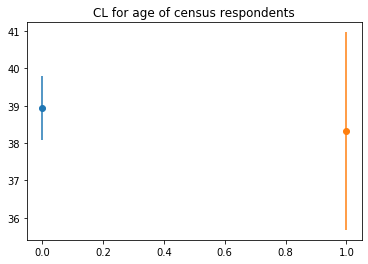

In [105]:
#error bars (similar to a box plot)
plt.errorbar(0, CI1[1], yerr=CI1[3], fmt='o')
plt.errorbar(1, CI2[1], yerr=CI2[3], fmt='o')
plt.title('CL for age of census respondents')


Text(0.5, 1.0, 'CL for age of census respondents')

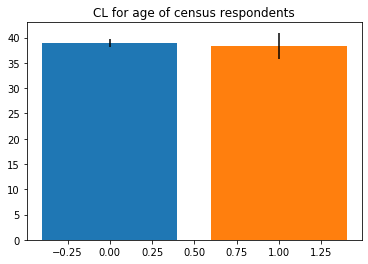

In [102]:
#bar graph
plt.bar(0, height=CI1[1], yerr=CI1[3])
plt.bar(1, height=CI2[1], yerr=CI2[3])
plt.title('CL for age of census respondents')

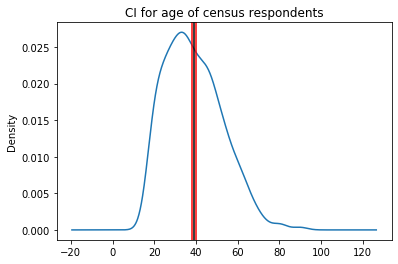

In [103]:
##density plot + vertical lines
#the CI does NOT capture 95% of the data from the sample,
#the CI captures 95% of sample means(potential locations for the population value)

sample['age'].plot.density()
plt.title('CI for age of census respondents')
plt.axvline(x=CI1[0], color = 'red')
plt.axvline(x=CI1[1], color = 'black')
plt.axvline(x=CI1[2], color = 'red')

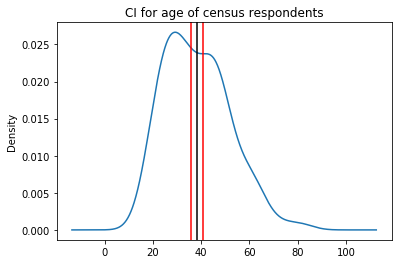

In [104]:
sample2['age'].plot.density()
plt.title('CI for age of census respondents')
plt.axvline(x=CI2[0], color = 'red')
plt.axvline(x=CI2[1], color = 'black')
plt.axvline(x=CI2[2], color = 'red')

## Relationship between Confidence Intervals and T-tests

### (Bonus Content) You will not be assessed on this material

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

A null hypothesis that's just inside of our confidence interval == fail to reject



A null hypothesis that's just outside of our confidence interval == reject

